# time notebook

This notebook visualises how the air quality index scores from the CSL monitor vary over different timeframes. Details of the air quality index used can be found [here](https://en.wikipedia.org/wiki/Air_quality_index#United_States).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# Data preparation

In [30]:
csl_data = pd.read_csv("data/csl_data.csv", na_values=['-1'])

csl_data = csl_data.drop('timestamp', axis=1) #this is always GMT, we want the timezone at the time
csl_data['Date'] = (csl_data['month'].astype(str)+'/'+csl_data['day'].astype(str)+'/'+
                   csl_data['year'].astype(str)+' '+csl_data['hour'].astype(str)+':'+
                   csl_data['minute'].astype(str))
csl_data['Date'] = pd.to_datetime(csl_data['Date'])
tokeep = [col for col in csl_data.columns if 'AQI' in col] + ['Date', 'hour', 'month', 'year']
csl_data = csl_data[tokeep]
csl_data = csl_data.dropna() #remove rows without AQI data
csl_data.head() #get date from BST columns

,AQI-1hr-index,AQI-1hr-PM10_0,AQI-1hr-PM2_5,AQI-1hr-NO2,AQI-1hr-CO,AQI-std-index,AQI-std-PM10_0,AQI-std-PM2_5,AQI-std-NO2,AQI-std-CO,Date,hour,month,year
411,19.941509,5.185185,16.666667,19.941509,0.363636,19.941509,2.932099,9.809028,19.941509,0.465199,2020-06-27 20:43:00,20,6,2020
412,19.940566,5.925926,16.666667,19.940566,0.363636,19.940566,2.989969,9.895833,19.940566,0.458097,2020-06-27 20:58:00,20,6,2020
413,20.532075,5.000000,14.166667,20.532075,0.363636,20.532075,2.932099,9.635417,20.532075,0.450994,2020-06-27 21:13:00,21,6,2020
414,20.990330,6.111111,17.500000,20.990330,0.363636,20.990330,2.883873,9.852431,20.990330,0.443892,2020-06-27 21:28:00,21,6,2020
415,20.988679,4.074074,13.333333,20.988679,0.363636,20.988679,2.826003,9.592014,20.988679,0.436790,2020-06-27 21:43:00,21,6,2020


# Overall change

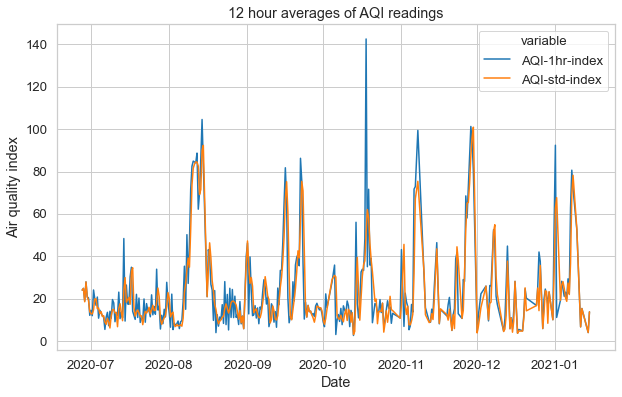

In [20]:
long_data = csl_data.set_index('Date').resample('12H').mean().reset_index()
long_data = long_data.melt(id_vars=['Date'], value_vars=['AQI-1hr-index', 'AQI-std-index'])

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(10, 6))
plt.title('12 hour averages of AQI readings')
sns.lineplot(data=long_data, x='Date', y='value', hue='variable');
plt.ylabel('Air quality index');

# Time of day

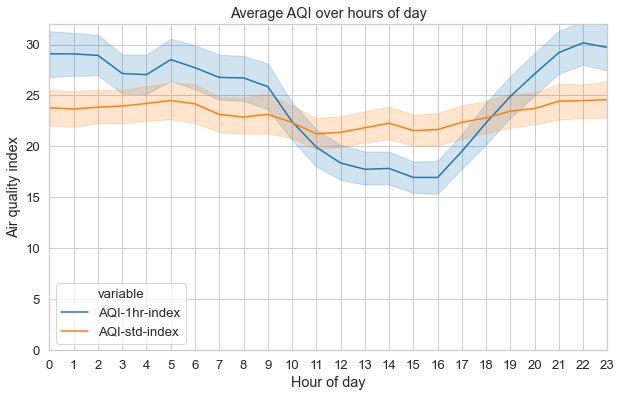

In [24]:
long_data = csl_data.melt(id_vars=['hour'], value_vars=['AQI-1hr-index', 'AQI-std-index'])

plt.figure(figsize=(10, 6))
plt.title("Average AQI over hours of day")
plt.ylim((0, 32))
plt.xlim(0, 23)
sns.lineplot(data=long_data, x='hour', y='value', hue='variable')
plt.ylabel("Air quality index")
plt.xlabel("Hour of day")
plt.xticks(list(range(0, 24)));

The one hour index varies more over the day than the standard index because it uses shorter averaging periods so can change more quickly.

We can see that the air quality is on average best from around 10am to 6pm and worst at night, peaking at 10pm. Although this may seem surprising, it matches [observations from other cities](https://smartairfilters.com/en/blog/when-is-pm-2-5-the-lowest/).

# Day of week

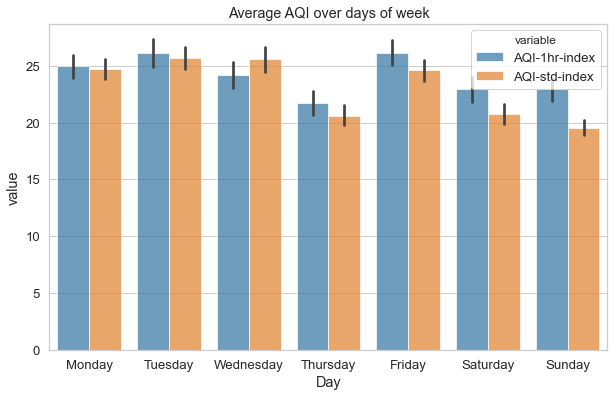

In [37]:
csl_data['weekday'] = csl_data['Date'].dt.dayofweek
long_data = csl_data.melt(id_vars=['weekday'], value_vars=['AQI-1hr-index', 'AQI-std-index'])
plt.figure(figsize=(10, 6))
plt.title("Average AQI over days of week")
plt.xlim(0, 6)
ax = sns.barplot(data=long_data, x='weekday', y='value', hue='variable', alpha=0.7)
ax.set(xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel("Day");

The average air quality only varies slightly between different days of the week.

# Month

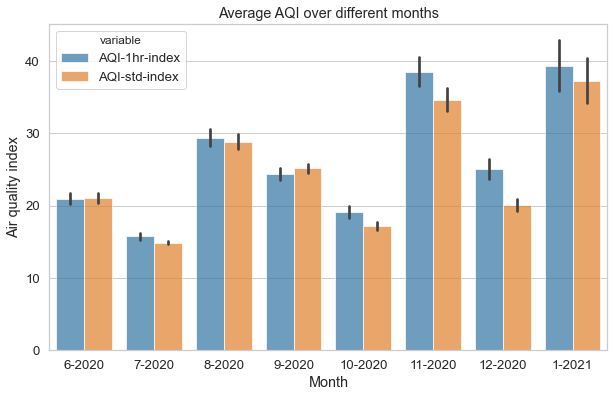

In [39]:
long_data = csl_data.melt(id_vars=['month', 'year'], value_vars=['AQI-1hr-index', 'AQI-std-index'])
long_data['monthyear'] = long_data['month'].map(str) + '-' + long_data['year'].map(str)

plt.figure(figsize=(10, 6))
plt.title("Average AQI over different months")
sns.barplot(data=long_data, x='monthyear', y='value', hue='variable', alpha=0.7);
plt.xlabel("Month")
plt.ylabel("Air quality index");